# Decision Trees

### Question 1 Optimal DT from table
**[20 points]**\
We will use the dataset below to learn a decision tree which predicts if people pass machine
learning (Yes or No), based on their previous GPA (High, Medium, or Low) and whether or
not they studied. 

| GPA | Studied | Passed |
|:---:|:-------:|:------:|
|  L  |    F    |    F   |
|  L  |    T    |    T   |
|  M  |    F    |    F   |
|  M  |    T    |    T   |
|  H  |    F    |    T   |
|  H  |    T    |    T   |
    
 For this problem, you can write your answers using $log_2$
, but it may be helpful to note
that $log_2 3 ≈ 1.6$.

---
1. What is the entropy H(Passed)?
2. What is the entropy H(Passed | GPA)?
3. What is the entropy H(Passed | Studied)?
4. Draw the full decision tree that would be learned for this dataset. You do
not need to show any calculations.
---


### Answers:

1) Entropy of Passed is $$H(Passed) = -\frac{2}{6}log_2\frac{2}{6} - \frac{4}{6}log_2\frac{4}{6} = 0.918$$
2) For calculating entropy of Passed given GPA:
$$ H(Passed|GPA=L) = -\frac{1}{2}log_2\frac{1}{2} - \frac{1}{2}log_2\frac{1}{2} = 1$$
$$ H(Passed|GPA=M) = -\frac{1}{2}log_2\frac{1}{2} - \frac{1}{2}log_2\frac{1}{2} = 1$$
$$ H(Passed|GPA=H) = -\frac{1}{1}log_2\frac{1}{1} = 0$$
$$ H(Passed|GPA) = \frac{1}{3}H(Passed|GPA=L) + \frac{1}{3}H(Passed|GPA=M) + \frac{1}{3}H(Passed|GPA=H) = 0.667$$
3) For calculating entropy of Passed given Studied:
$$ H(Passed|Studied=F) = -\frac{2}{3}log_2\frac{2}{3} - \frac{1}{3}log_2\frac{1}{3} = 0.918$$
$$ H(Passed|Studied=T) = -\frac{1}{1}log_2\frac{1}{1} = 0$$
$$ H(Passed|Studied) = \frac{3}{6}H(Passed|Studied=F) + \frac{3}{6}H(Passed|Studied=T) = 0.459$$

### Question 2 DT loss functions
**[10 points]**
1. Explain Gini impurity and Entropy. 
2. What are the min and max values for both Gini impurity and Entropy
3. Plot the Gini impurity and Entropy for $p\in[0,1]$.
4. Multiply Gini impurity by a factor of 2 and overlay it over entropy.

### Answers:

1) Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Entropy is a measure of the uncertainty of a random variable. It is the average amount of information needed to identify the value of a random variable.

* Formula for Gini impurity is $$Gini(p) = 2p(1-p)$$
* Formula for Entropy is $$Entropy(p) = -plog_2p - (1-p)log_2(1-p)$$

2) Gini impurity ranges from 0 to 0.5 and Entropy ranges from 0 to 1.

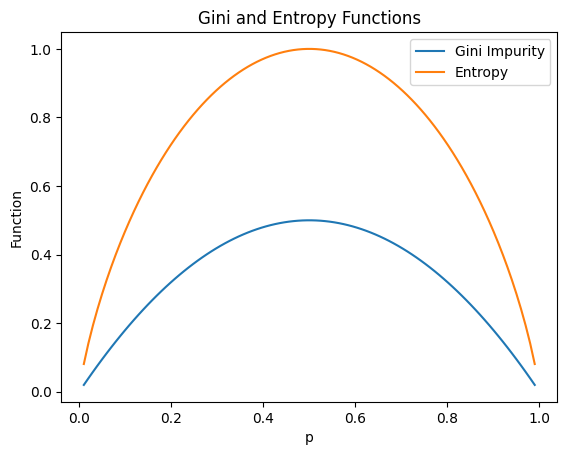

In [21]:

#####################################################
#              3.1 GINI IMPURITY PLOT               #
#####################################################

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Plotter Function
def plotter(x, y, title, x_label, y_label, z_label = None):
    plt.plot(x, y, label=z_label)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()

# Plot Gini Impurity Function
def gini_impurity_plotter():
    x = np.linspace(0.01, 0.99, 100)
    y = 2 * x * (1 - x)
    plotter(x, y, "Gini and Entropy Functions", "p", "Function", "Gini Impurity")

# Plot Entropy Function
def entropy_plotter():
    x = np.linspace(0.01, 0.99, 100)
    y = -x * np.log2(x) - (1 - x) * np.log2(1 - x)
    plotter(x, y, "Gini and Entropy Functions", "p", "Function", "Entropy")

# Plot Gini and Entropy Functions
gini_impurity_plotter()
entropy_plotter()
plt.show()


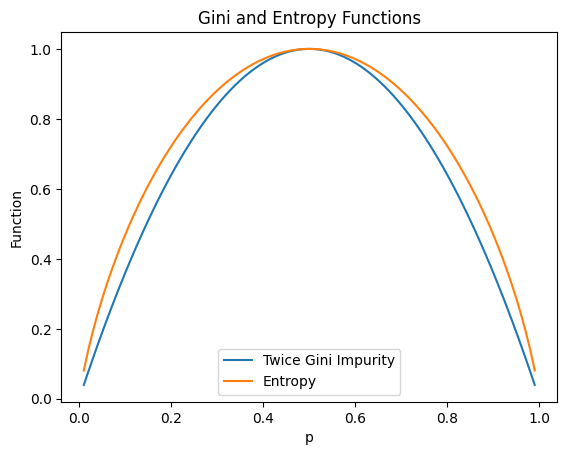

In [22]:

#####################################################
#                        4                          #
#####################################################

# Plot Gini Impurity Function
def gini_impurity_plotter():
    x = np.linspace(0.01, 0.99, 100)
    y = 4 * x * (1 - x)
    plotter(x, y, "Gini and Entropy Functions", "p", "Function", "Twice Gini Impurity")

# Plot Entropy Function
def entropy_plotter():
    x = np.linspace(0.01, 0.99, 100)
    y = -x * np.log2(x) - (1 - x) * np.log2(1 - x)
    plotter(x, y, "Gini and Entropy Functions", "p", "Function", "Entropy")

# Plot Gini and Entropy Functions
gini_impurity_plotter()
entropy_plotter()
plt.show()


### Question 3 Training a Decision Tree  
**[40 points]**

You can download the spam dataset from the link given below. This dataset contains feature vectors and the lables of Spam/Non-Spam mails. 
http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data

**NOTE: The last column in each row represents whether the mail is spam or non spam**\
Although not needed, incase you want to know what the individual columns in the feature vector means, you can read it in the documentation given below.
http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.DOCUMENTATION

**Download the data and load it from the code given below**

In [23]:

#######################
# Your code goes here #
#######################

# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#  

# mutual_info = np.zeros(np.shape(X)[1])
# for i in range(np.shape(X)[1]):
#     print(mutual_info_classif(X[:, i].reshape(-1, 1), y))
# print(mutual_info)

# Sorting the mutual information in descending order
mutual_info_sorted = np.sort(mutual_info)[::-1]
# Importing the dataset
no_of_cols_x = 57
no_of_samples = 4601

# Loading the dataset
dataset = pd.read_csv('spambase.data', header=None)

# Putthing the data into X and y
X = dataset.iloc[:, 0:no_of_cols_x].values
y = dataset.iloc[:, no_of_cols_x].values

# print(X.shape)
# print(y.shape)

You can try to normalize each column (feature) separately with wither one of the following ideas. **Do not normalize labels**.
- Shift-and-scale normalization: substract the minimum, then divide by new maximum. Now all values are between 0-1
- Zero mean, unit variance : substract the mean, divide by the appropriate value to get variance=1.

In [24]:

#######################
# Your code goes here #
#######################

# normalizing the data according to the zero mean and unit variance
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
# calculate the variance of each feature
# variance = np.var(X, axis=0)
# print(variance)

1. Split your data into train 80% and test dataset 20% 
2. **[BONUS]** Visualize the data using PCA . You can reduce the dimension of the data if you want. Bonus marks if this increases your accuracy.

*NOTE: If you are applying PCA or any other type of dimensionality reduction, do it before splitting the dataset*

* I tried to visualize the data using PCA, LDA, and feature selection using mutual information gain but it didn't increase the accuracy. So I didn't include it in the code.
* But I left it in the comments so that you can see the code.

In [25]:

#######################
# Your code goes here #
#######################

# Feature selection using LDAs
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# lda = LDA(n_components=1)
# X = lda.fit_transform(X, y)

# Feature selection using split information gain
# from sklearn.feature_selection import mutual_info_classif
# mutual_info = mutual_info_classif(X, y)
# print(mutual_info)

# Selecting the top 40 features according to maximum mutual information
# X = X[:, np.argsort(mutual_info)[::-1][:10]]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


You need to perform a K fold validation on this and report the average training error over all the k validations. 
- For this , you need to split the training data into k splits.
- For each split, train a decision tree model and report the training , validation and test scores.
- Report the scores in a tabular form for each validation

In [26]:

#######################
# Your code goes here #
#######################

# Initialize K
K = 10

# Split the data into K folds
X_train_folds = np.array_split(X_train, K)
y_train_folds = np.array_split(y_train, K)

# Importing the libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the classifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

# Initialize the scores
training_score = []
validation_score = []
test_score = []

# Run the K fold validation
for i in range(K):
    # Split the data into training and validation
    X_train_fold = np.concatenate(X_train_folds[:i] + X_train_folds[i+1:])
    y_train_fold = np.concatenate(y_train_folds[:i] + y_train_folds[i+1:])

    X_val_fold = X_train_folds[i]
    y_val_fold = y_train_folds[i]
    
    # Train the classifier
    classifier.fit(X_train_fold, y_train_fold)
    
    # Predict the validation set
    y_val_pred = classifier.predict(X_val_fold)

    # Predict the test set
    y_test_pred = classifier.predict(X_test)
    y_train_pred = classifier.predict(X_train_fold)
    
    # Calculate the scores
    training_score.append(accuracy_score(y_train_fold, y_train_pred))
    validation_score.append(accuracy_score(y_val_fold, y_val_pred))
    test_score.append(accuracy_score(y_test, y_test_pred))
    

# Print the scores in a table
print("Scores for the Decision Tree Classifier")
df = pd.DataFrame({'Training Score': training_score, 'Validation Score': validation_score, 'Test Score': test_score})
print(df)

# Print Average Scores
print()
print("Average Scores for the Decision Tree Classifier")
print("Training Score: ", np.mean(training_score))
print("Validation Score: ", np.mean(validation_score))
print("Test Score: ", np.mean(test_score))

Scores for the Decision Tree Classifier
   Training Score  Validation Score  Test Score
0        1.000000          0.921196    0.917481
1        0.999698          0.915761    0.903366
2        0.999698          0.899457    0.917481
3        0.999698          0.921196    0.929425
4        0.999698          0.937500    0.916395
5        0.999698          0.923913    0.918567
6        0.999698          0.926630    0.913138
7        0.999698          0.921196    0.914224
8        0.999698          0.934783    0.925081
9        1.000000          0.915761    0.904452

Average Scores for the Decision Tree Classifier
Training Score:  0.9997584541062803
Validation Score:  0.9217391304347824
Test Score:  0.9159609120521173


### Question 4 Random Forest Algorithm
**[30 points]**

1. What is boosting, bagging and  stacking?
Which class does random forests belong to and why? **[5 points]**

### Answer: 

* Boosting: Boosting is a sequential technique which works on the principle of an ensemble. It combines a set of weak learners and delivers improved prediction accuracy. The weak learners are generally decision trees. The final result is a weighted sum of all the predictions made by the weak learners. The weights are assigned to all predictions according to their accuracies in the previous round.

* Stacking: Stacking is an ensemble learning technique to combine multiple classification models via a meta-classifier. The base level models are trained based on a complete training set, then the meta-classifier is trained on the outputs of the base level model as features. The final prediction is done by the meta-classifier.

* Random forests is a bagging algorithm. Bagging is a technique in which multiple models are trained on different subsets of the data and then combined to get a better model. 

* Random forests is a bagging algorithm because it trains multiple decision trees on different subsets of the data and then combines them to get a better model.

2. Implement random forest algorithm using different decision trees. **[25 points]** 

In [28]:
# Importing the libraries
from collections import Counter

# Random Forest Classifier from scratch
class RandomForest:
    def __init__(self, n_trees=1000, max_depth=40, min_samples_split=2, n_features=7, n_samples=3000):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_features
        self.n_samples = n_samples
        self.trees = []

    def fit(self, X, y):
        self.trees=[]
        for i in range(self.n_trees):
            tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=self.max_depth, 
                        max_features=self.n_features, min_samples_split=self.min_samples_split, random_state = 0)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        idxs = np.random.choice(self.n_samples, self.n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(tree_pred) for tree_pred in tree_preds])
        return predictions
    
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

# Initialize the classifier
classifier = RandomForest()

# Train the classifier
classifier.fit(X_train, y_train)

# Predict the test and training set
y_pred_test = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

# Calculate the accuracy
print("Training Accuracy: ", accuracy(y_train, y_pred_train))
print("Test_Accuracy: ", accuracy(y_test, y_pred_test))
    

Training Accuracy:  0.9934782608695653
Test_Accuracy:  0.9402823018458197
